# Lesson 14 - Create an image dataset

> In preparation of lesson 15 we create an image dataset.

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/lewtun/dslectures/master?urlpath=lab/tree/notebooks%2Flesson14_image-dataset.ipynb) [![slides](https://img.shields.io/static/v1?label=slides&message=lesson14_image-dataset.pdf&color=blue&logo=Google-drive)](https://drive.google.com/open?id=16cPFIu-tmZ8Op8awMvIiXi-vcMbTmleu)

## Learning objectives
In this lecture we will create an image dataset that we can then use in the next lecture to build an image classifier. To get labeled data we will download the images from Google image searches. 

You should learn how to create new dataset, look at examples and save the dataset.

## References
This lesson prepares for lesson 15 where we will create an image classifier. This content will be similar to the first lesson of the fastai course. If you have time we recommend watching the the lesson recording.
* Practical Deep Learning for Coders - Lesson 1: Image classification by fastai [[video](https://youtu.be/XfoYk_Z5AkI)]

## Homework
Create at least one image dataset.

## Goal

Before we can create an image classifier we need to create a dataset with training data. We could you one of the standard image datasets but in real life you usually need to be creative to get enough labeled data for your use-case. We will download images from Google search to download images corresponding to a certain category.

<div style="text-align: center">
<img src='images/data-meme.jpg' width='400'>
</div>


At the end of this notebook you should have at least one dataset with images of different categories. The format of the dataset should be the following:

```
data 
│
└───dog_vs_cat_dataset
    │
    └───cat
    │   │   cat_img_1.png
    │   │   cat_img_2.png
    │   │   ...
    │
    └───dog
        │   dog_img_1.png
        │   dog_img_2.png
        │   ...
```

This is the same structure we already encountered when we trained a text classifier with `ULMFiT` in the last lecture. Every class (i.e. image label) is contained in a folder that is named after the class. We built a helper class called `ImageDownloader` that we can use to set this up. This class also downloads Google image search results automatically into these folders.

## Prerequisites
In order to get the images from Google search we need the `chromium-chromedriver`. If you run this notebook on binder `chromium-chromedriver` is already installed. If you want to install it on an other machine you need to install it manually. On a linux machine this can be done with the following commands:

In [ ]:
# ! apt-get update
# ! apt-get install chromium-chromedriver

For more information visit https://www.chromium.org/.

## Install fastai library
First we need to install the fastai library since we need some of its helper functions to download images and then also visualise the downloaded images.

> Note: This step might take a few minutes.

In [ ]:
!pip install fastai --no-cache-dir -qq

## Import

Then we can import the `ImageDownloader` and the fastai helper functions.

In [ ]:
# uncomment if running locally or on Google Colab
# !pip install --upgrade dslectures

In [ ]:
from dslectures.image_downloader import ImageDownloader
from fastai.vision import *

## Create dataset
Now we need to define where we want to save the dataset and what it should be called. As usual, we save it in the `../data/` folder. In this example I want to create a memes dataset.

In [ ]:
data_path = Path('../data/')
dataset_name = 'memes'

With this information we can create a new `ImageDownloader` object.

In [ ]:
img_dl = ImageDownloader(data_path, dataset_name)

This will also create a new folder in the `data_path` called `'meme'`:

In [ ]:
data_path.ls()

[PosixPath('../data/.gitkeep'), PosixPath('../data/memes')]

## Create new class
We are now ready to create our first class in this dataset. We want to create two classes: one containing dank memes and another class with lame memes. Therefore we call the first class `'dank_meme'`. This will also be the name of the folder in the dataset folder. It is usually a good idea to avoid whitespaces when naming folders and files. You can replace them with underscores or dashes.

The second piece of information we need is the search query. This is what you would enter on the Google search website. In this case we want to search for `'dank memes'`.

> Note: Since a lot of information about a meme is stored in text written on top of the image this particular example could be very hard for image classifiers. Ideally, pick an example where all the necessary information for the classification is stored in the image itself.

In [ ]:
class_name = 'dank_meme'
search_query = 'dank meme'

img_dl.add_images_to_class(class_name, search_query)

549 image links found on Google image search for the query "dank meme".


549 images now available in class dank_meme.


Depending on the search query this should yield somewhere between 100-700 images that are stored in the class folder. Maybe you want to download images from several search queries into the same class folder. You can do that with the image downloader. Simply create another query and pass it with the same class name.

In [ ]:
search_query = 'great meme'

img_dl.add_images_to_class(class_name, search_query)

459 image links found on Google image search for the query "great meme".


1006 images now available in class dank_meme.


In [ ]:
search_query = 'funny meme'

img_dl.add_images_to_class(class_name, search_query)

609 image links found on Google image search for the query "funny meme".


1609 images now available in class dank_meme.


This should be enough images for that class to work with.

## Create another class

We now want to create the second class in our dataset with lame memes. To do so we can run the same function but with a different `class_name`.

In [ ]:
class_name = 'lame_meme'
search_query = 'lame meme'

img_dl.add_images_to_class(class_name, search_query)

496 image links found on Google image search for the query "lame meme".


496 images now available in class lame_meme.


You can create as many classes as you want withing one dataset. For the purpose of next weeks lecture we suggest creating at least one dataset with 2-20 classes. Of course you can also create more than one dataset!

## Delete dataset
It can happen that you want to start from scratch. Unfortunately, deleting folders that contain files is not possible from within JupyterLab. You can use the following command to delete a folder with all its content.

> Warning: This command is not reversible and deletes all the contents of the target folder recursively. Make sure you don't run it on the wrong folder on your local machine.

In [ ]:
# !rm -rf ../data/my_dataset_name/

## Delete class
If you only want to delete a certain class in your dataset you can do this with the following command

In [ ]:
# !rm -rf ../data/my_dataset_name/my_class/

## Look at some examples
Finally we want to look at some examples. This might look familiar from the data loading functions in the last lecture and is indeed also part of the fastai library.

In [ ]:
(data_path/dataset_name).ls()

[PosixPath('../data/memes/lame_meme'), PosixPath('../data/memes/dank_meme')]

In [ ]:
data = ImageDataBunch.from_folder(data_path/dataset_name, valid_pct=0.2, size=224)

Once we loaded the data we can plot a random selection of images from the dataset.

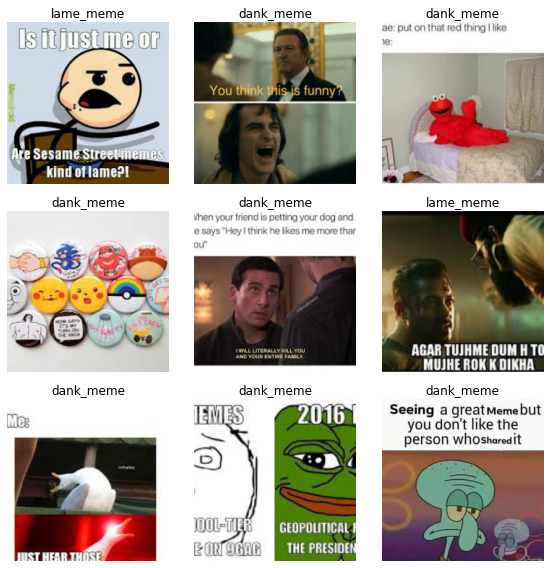

In [ ]:
data.show_batch(rows=3, figsize=(8, 8)) 

## Download dataset
Finally, we need to download the dataset, since storage on Binder is not persistent. Downloading each image individually is note really practical, therefore we compress the dataset folder which we can then download.

In [ ]:
!tar -zcf {data_path/dataset_name}.tar.gz {data_path/dataset_name}

tar: Removing leading `../' from member names


Clicking on the folder icon on the top left of the JupyterLab user interface you should be able to navigate to the `'../data/'` folder and then right click on the compressed file (with the file ending `.tar.gz`) and download it.